In [ ]:
import requests
import pandas as pd

# Step 1: Download the data
url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"
response = requests.get(url)
data = response.json()

# Step 2: Process the data
pokemon_data = []
for pokemon in data["pokemon"]:
  try:
    multipliers = ", ".join([str(multiplier) for multiplier in pokemon.get("multipliers", [])])
  except:
    multipliers = "None"
  pokemon_entry = {
      "id": pokemon.get("id", ""),
      "num": pokemon.get("num", ""),
      "name": pokemon.get("name", ""),
      "img": pokemon.get("img", ""),
      "type": ", ".join(pokemon.get("type", [])),
      "height": pokemon.get("height", ""),
      "weight": pokemon.get("weight", ""),
      "candy": pokemon.get("candy", ""),
      "candy_count": pokemon.get("candy_count", 0),
      "egg": pokemon.get("egg", ""),
      "spawn_chance": pokemon.get("spawn_chance", 0),
      "avg_spawns": pokemon.get("avg_spawns", 0),
      "spawn_time": pokemon.get("spawn_time", ""),
      "weakness": ", ".join(pokemon.get("weaknesses", [])),
      "next_evolution": ", ".join([evolution.get("name", "") for evolution in pokemon.get("next_evolution", [])]),
      "prev_evolution": ", ".join([evolution.get("name", "") for evolution in pokemon.get("prev_evolution", [])]),
      "multipliers": multipliers
  }
  pokemon_data.append(pokemon_entry)

# Step 3: Convert data to a DataFrame
df = pd.DataFrame(pokemon_data)

In [ ]:
df.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,weakness,next_evolution,prev_evolution,multipliers
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass, Poison",0.71 m,6.9 kg,Bulbasaur Candy,25,2 km,0.690,69.0,20:00,"Fire, Ice, Flying, Psychic","Ivysaur, Venusaur",,1.58
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99 m,13.0 kg,Bulbasaur Candy,100,Not in Eggs,0.042,4.2,07:00,"Fire, Ice, Flying, Psychic",Venusaur,Bulbasaur,"1.2, 1.6"
2,3,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01 m,100.0 kg,Bulbasaur Candy,0,Not in Eggs,0.017,1.7,11:30,"Fire, Ice, Flying, Psychic",,"Bulbasaur, Ivysaur",None
3,4,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25,2 km,0.253,25.3,08:45,"Water, Ground, Rock","Charmeleon, Charizard",,1.65
4,5,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100,Not in Eggs,0.012,1.2,19:00,"Water, Ground, Rock",Charizard,Charmander,1.79


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              151 non-null    int64  
 1   num             151 non-null    object 
 2   name            151 non-null    object 
 3   img             151 non-null    object 
 4   type            151 non-null    object 
 5   height          151 non-null    object 
 6   weight          151 non-null    object 
 7   candy           151 non-null    object 
 8   candy_count     151 non-null    int64  
 9   egg             151 non-null    object 
 10  spawn_chance    151 non-null    float64
 11  avg_spawns      151 non-null    float64
 12  spawn_time      151 non-null    object 
 13  weakness        151 non-null    object 
 14  next_evolution  151 non-null    object 
 15  prev_evolution  151 non-null    object 
 16  multipliers     151 non-null    object 
dtypes: float64(2), int64(2), object(13)

In [ ]:
df.shape

(151, 17)

In [ ]:
df.describe()

,id,candy_count,spawn_chance,avg_spawns
count,151.000000,151.000000,151.000000,151.000000
mean,76.000000,26.562914,0.731985,53.992603
std,43.734045,43.837819,1.956376,111.156064
min,1.000000,0.000000,0.000000,0.000000
25%,38.500000,0.000000,0.015500,1.450000
50%,76.000000,0.000000,0.074000,7.200000
75%,113.500000,50.000000,0.620000,55.000000
max,151.000000,400.000000,15.980000,712.000000


In [ ]:
df.head(2)

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,weakness,next_evolution,prev_evolution,multipliers
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass, Poison",0.71 m,6.9 kg,Bulbasaur Candy,25,2 km,0.690,69.0,20:00,"Fire, Ice, Flying, Psychic","Ivysaur, Venusaur",,1.58
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99 m,13.0 kg,Bulbasaur Candy,100,Not in Eggs,0.042,4.2,07:00,"Fire, Ice, Flying, Psychic",Venusaur,Bulbasaur,"1.2, 1.6"


In [ ]:
df['egg'].unique()

array(['2 km', 'Not in Eggs', '5 km', '10 km', 'Omanyte Candy'],
      dtype=object)

In [ ]:
df['egg'] = df['egg'].str.replace("Omanyte Candy",'0')

In [ ]:
df['prev_evolution'].unique()

array(['', 'Bulbasaur', 'Bulbasaur, Ivysaur', 'Charmander',
       'Charmander, Charmeleon', 'Squirtle', 'Squirtle, Wartortle',
       'Caterpie', 'Caterpie, Metapod', 'Weedle', 'Weedle, Kakuna',
       'Pidgey', 'Pidgey, Pidgeotto', 'Rattata', 'Spearow', 'Ekans',
       'Pikachu', 'Sandshrew', 'Nidoran(Female)',
       'Nidoran(Female), Nidorina', 'Nidoran(Male)',
       'Nidoran(Male), Nidorino', 'Clefairy', 'Vulpix', 'Jigglypuff',
       'Zubat', 'Oddish', 'Oddish, Gloom', 'Paras', 'Venonat', 'Diglett',
       'Meowth', 'Psyduck', 'Mankey', 'Growlithe', 'Poliwag',
       'Poliwag, Poliwhirl', 'Abra', 'Abra, Kadabra', 'Machop',
       'Machop, Machoke', 'Bellsprout', 'Bellsprout, Weepinbell',
       'Tentacool', 'Geodude', 'Geodude, Graveler', 'Ponyta', 'Slowpoke',
       'Magnemite', 'Doduo', 'Seel', 'Grimer', 'Shellder', 'Gastly',
       'Gastly, Haunter', 'Drowzee', 'Krabby', 'Voltorb', 'Exeggcute',
       'Cubone', 'Koffing', 'Rhyhorn', 'Horsea', 'Goldeen', 'Staryu',
       'Magi

In [ ]:
df.columns

Index(['id', 'num', 'name', 'img', 'type', 'height', 'weight', 'candy',
       'candy_count', 'egg', 'spawn_chance', 'avg_spawns', 'spawn_time',
       'weakness', 'next_evolution', 'prev_evolution', 'multipliers'],
      dtype='object')

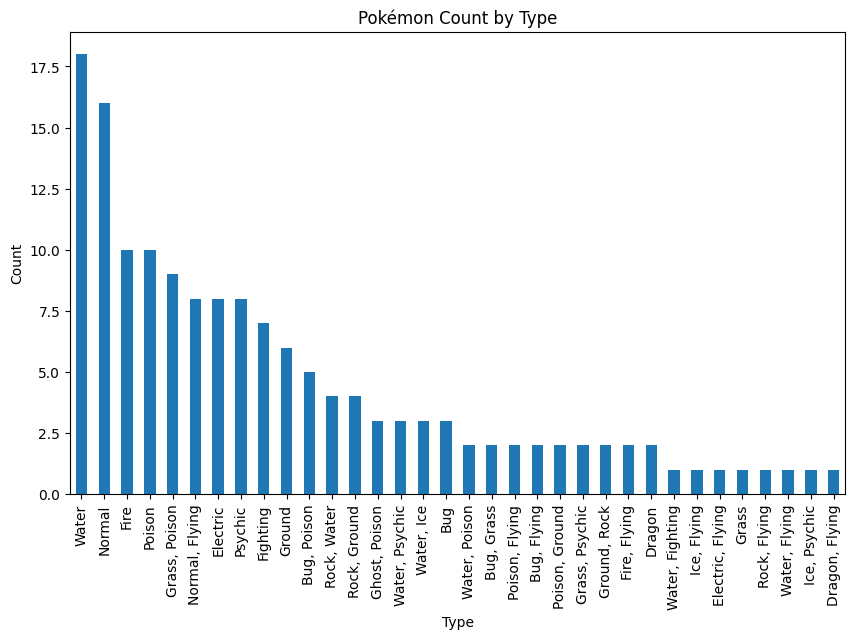

In [ ]:
pokemon_type_counts = df['type'].value_counts()
plt.figure(figsize=(10, 6))
pokemon_type_counts.plot(kind='bar')
plt.title("Pokémon Count by Type")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

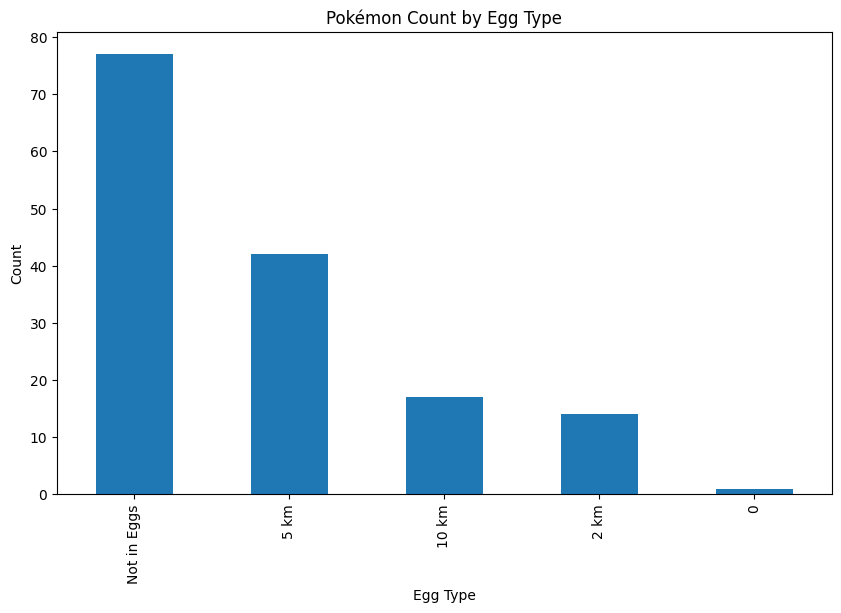

In [ ]:
pokemon_egg_counts = df['egg'].value_counts()
plt.figure(figsize=(10, 6))
pokemon_egg_counts.plot(kind='bar')
plt.title("Pokémon Count by Egg Type")
plt.xlabel("Egg Type")
plt.ylabel("Count")
plt.show()

In [ ]:
df.head(2)

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass,Poison",0.71 m,6.9 kg,Bulbasaur Candy,25,2 km,0.690,69.0,20:00,[1.58],"Fire,Ice,Flying,Psychic","002: Ivysaur,003: Venusaur",
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass,Poison",0.99 m,13.0 kg,Bulbasaur Candy,100,Not in Eggs,0.042,4.2,07:00,"[1.2, 1.6]","Fire,Ice,Flying,Psychic",003: Venusaur,001: Bulbasaur


1.  Get all Pokemons whose spawn rate is less than 5%

In [ ]:
spawn_rate = 0.05  
low_spawn_pokemon = df[df['spawn_chance'] < spawn_rate]
print("Pokemons with spawn rate less than 5%:")
print(low_spawn_pokemon[['name', 'spawn_chance']])

Pokemons with spawn rate less than 5%:
           name  spawn_chance
1       Ivysaur        0.0420
2      Venusaur        0.0170
4    Charmeleon        0.0120
5     Charizard        0.0031
7     Wartortle        0.0340
..          ...           ...
145     Moltres        0.0000
147   Dragonair        0.0200
148   Dragonite        0.0011
149      Mewtwo        0.0000
150         Mew        0.0000

[65 rows x 2 columns]


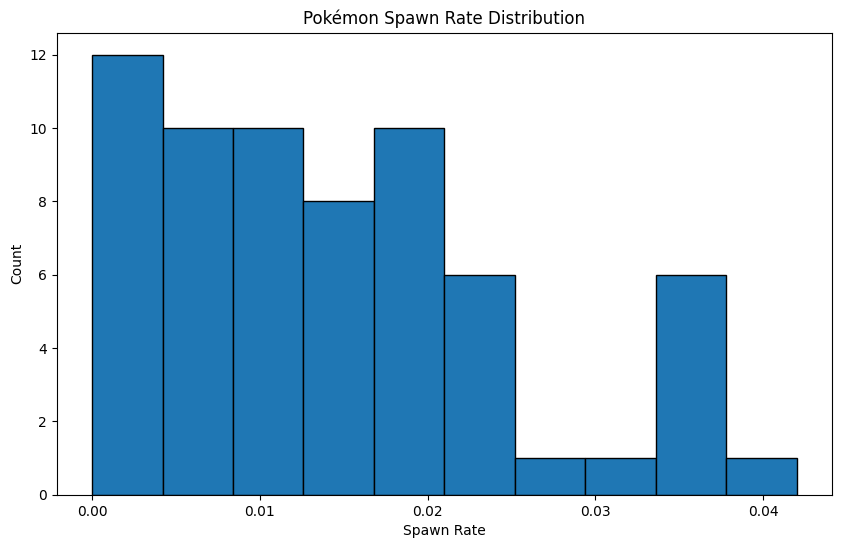

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(low_spawn_pokemon['spawn_chance'], bins=10, edgecolor='black')
plt.title("Pokémon Spawn Rate Distribution")
plt.xlabel("Spawn Rate")
plt.ylabel("Count")
plt.show()

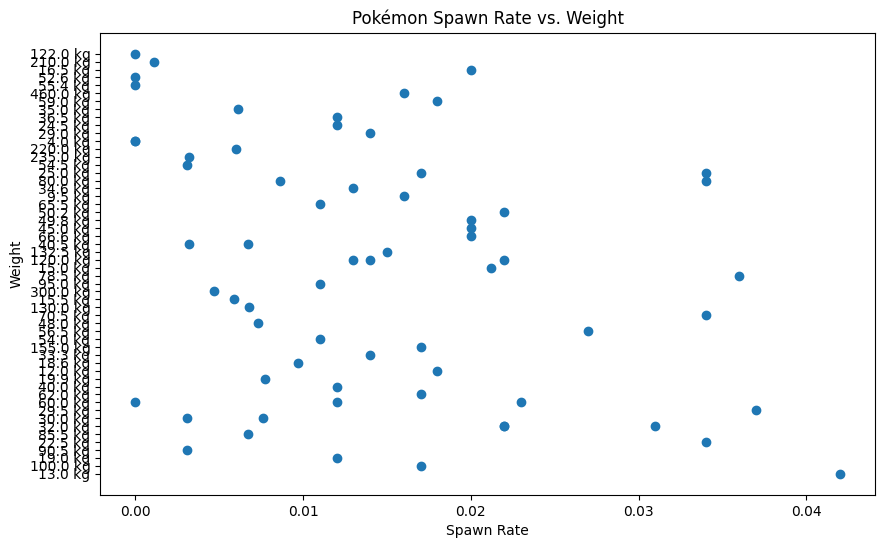

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(low_spawn_pokemon['spawn_chance'], low_spawn_pokemon['weight'])
plt.title("Pokémon Spawn Rate vs. Weight")
plt.xlabel("Spawn Rate")
plt.ylabel("Weight")
plt.show()

2. Get all Pokemons that have less than 4 weaknesses


In [ ]:
max_weakness_count = 4
pokemon_with_few_weaknesses = df[df['weaknesses'].str.count(',') < max_weakness_count]
print("Pokémon with less than 4 weaknesses:")
print(pokemon_with_few_weaknesses[['name', 'weaknesses']])


Pokémon with less than 4 weaknesses:
           name               weaknesses
0     Bulbasaur  Fire,Ice,Flying,Psychic
1       Ivysaur  Fire,Ice,Flying,Psychic
2      Venusaur  Fire,Ice,Flying,Psychic
3    Charmander        Water,Ground,Rock
4    Charmeleon        Water,Ground,Rock
..          ...                      ...
146     Dratini         Ice,Dragon,Fairy
147   Dragonair         Ice,Dragon,Fairy
148   Dragonite    Ice,Rock,Dragon,Fairy
149      Mewtwo           Bug,Ghost,Dark
150         Mew           Bug,Ghost,Dark

[132 rows x 2 columns]


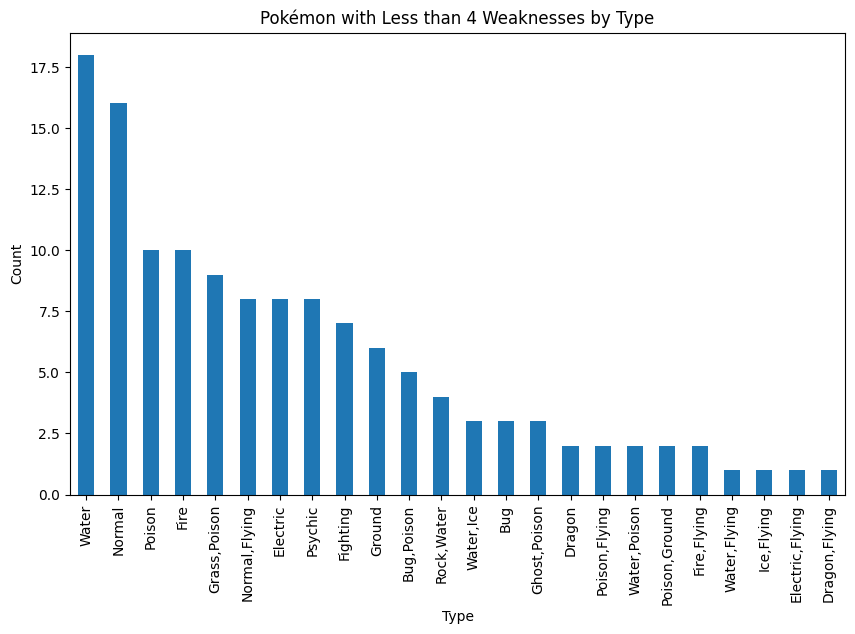

In [ ]:
pokemon_count_by_type = pokemon_with_few_weaknesses['type'].value_counts()
plt.figure(figsize=(10, 6))
pokemon_count_by_type.plot(kind='bar')
plt.title("Pokémon with Less than 4 Weaknesses by Type")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

3. Get all Pokemons that have no multipliers at all


In [ ]:
df['multipliers']

0            1.58
1        1.2, 1.6
2            None
3            1.65
4            1.79
          ...    
146    1.83, 1.84
147          2.05
148          None
149          None
150          None
Name: multipliers, Length: 151, dtype: object

In [ ]:
pokemon_with_no_multipliers = df[df['multipliers'] == "None"]
print("Pokémon with no multipliers:")
print(pokemon_with_no_multipliers[['name', 'multipliers']])


Pokémon with no multipliers:
           name multipliers
2      Venusaur        None
5     Charizard        None
8     Blastoise        None
11   Butterfree        None
14     Beedrill        None
..          ...         ...
144      Zapdos        None
145     Moltres        None
148   Dragonite        None
149      Mewtwo        None
150         Mew        None

[81 rows x 2 columns]


4. Get all Pokemons that do not have more than 2 evolutions


In [ ]:
pokemon_with_few_evolutions = df[df['next_evolution'].apply(lambda x: len(x.split(',')) <= 2)]
print("Pokémon with no more than 2 evolutions:")
print(pokemon_with_few_evolutions[['name', 'next_evolution']])


Pokémon with no more than 2 evolutions:
           name                  next_evolution
0     Bulbasaur      002: Ivysaur,003: Venusaur
1       Ivysaur                   003: Venusaur
2      Venusaur                                
3    Charmander  005: Charmeleon,006: Charizard
4    Charmeleon                  006: Charizard
..          ...                             ...
146     Dratini   148: Dragonair,149: Dragonite
147   Dragonair                  149: Dragonite
148   Dragonite                                
149      Mewtwo                                
150         Mew                                

[150 rows x 2 columns]


5.  Get all Pokemons whose spawn time is less than 300 seconds

In [ ]:
df["spawn_time"].unique()

array(['20:00', '07:00', '11:30', '08:45', '19:00', '13:34', '04:25',
       '07:02', '00:06', '16:35', '02:11', '05:23', '02:21', '02:30',
       '04:50', '01:34', '01:30', '01:50', '01:55', '01:56', '12:25',
       '01:11', '12:20', '04:00', '23:58', '01:58', '12:34', '01:51',
       '07:22', '12:35', '01:12', '09:02', '12:16', '03:30', '03:29',
       '13:43', '01:32', '08:46', '12:28', '02:15', '03:58', '11:33',
       '01:42', '01:22', '02:31', '23:40', '02:22', '12:37', '02:54',
       '02:44', '03:41', '23:06', '12:52', '12:33', '03:57', '03:11',
       '03:40', '09:14', '04:30', '11:25', '10:32', '02:55', '04:10',
       '09:45', '12:19', '03:20', '23:36', '12:40', '04:53', '02:50',
       '07:12', '02:56', '04:04', '15:25', '01:09', '05:10', '02:12',
       '06:46', '06:04', '15:11', '01:28', '07:39', '02:33', '04:21',
       '00:10', '03:55', '01:18', '02:17', '03:33', '03:44', '04:36',
       '09:09', '03:59', '05:58', '02:46', '08:16', '12:17', '03:21',
       '05:50', '04:

In [ ]:
spawn_time_threshold = "05:00"
pokemon_with_short_spawn_time = df[df['spawn_time'] < spawn_time_threshold]
print("Pokémon with spawn time less than 300 seconds:")
print(pokemon_with_short_spawn_time[['name', 'spawn_time']])


Pokémon with spawn time less than 300 seconds:
          name spawn_time
6     Squirtle      04:25
8    Blastoise      00:06
10     Metapod      02:11
12      Weedle      02:21
13      Kakuna      02:30
..         ...        ...
127     Tauros      00:37
129   Gyarados      02:15
134    Jolteon      02:30
136    Porygon      02:49
139     Kabuto      00:05

[75 rows x 2 columns]


6. Get all Pokemon who have more than two types of capabilities

In [ ]:
df.head(2)

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass,Poison",0.71 m,6.9 kg,Bulbasaur Candy,25,2 km,0.690,69.0,20:00,[1.58],"Fire,Ice,Flying,Psychic","002: Ivysaur,003: Venusaur",
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass,Poison",0.99 m,13.0 kg,Bulbasaur Candy,100,Not in Eggs,0.042,4.2,07:00,"[1.2, 1.6]","Fire,Ice,Flying,Psychic",003: Venusaur,001: Bulbasaur


In [ ]:
df['type'].unique()

array(['Grass,Poison', 'Fire', 'Fire,Flying', 'Water', 'Bug',
       'Bug,Flying', 'Bug,Poison', 'Normal,Flying', 'Normal', 'Poison',
       'Electric', 'Ground', 'Poison,Ground', 'Poison,Flying',
       'Bug,Grass', 'Fighting', 'Water,Fighting', 'Psychic',
       'Water,Poison', 'Rock,Ground', 'Water,Psychic', 'Water,Ice',
       'Ghost,Poison', 'Grass,Psychic', 'Ground,Rock', 'Grass',
       'Ice,Psychic', 'Water,Flying', 'Rock,Water', 'Rock,Flying',
       'Ice,Flying', 'Electric,Flying', 'Dragon', 'Dragon,Flying'],
      dtype=object)

In [ ]:
pokemon_with_multiple_types = df[df['type'].apply(lambda x: len(x.split(','))) > 2]
print("Pokémon with more than two types of capabilities:")
print(pokemon_with_multiple_types[['name', 'type']])

# Here there are no pokemon with more than 2 cpabilities.

Pokémon with more than two types of capabilities:
Empty DataFrame
Columns: [name, type]
Index: []


--------------------------------------------------------------------------------------------

*************ENDED*********************

-----------------------------------------------------------------------------------------------------